In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.datasets import load_linnerud

In [4]:
linnerud = load_linnerud()
print(linnerud.DESCR)

.. _linnerrud_dataset:

Linnerrud dataset
-----------------

**Data Set Characteristics:**

    :Number of Instances: 20
    :Number of Attributes: 3
    :Missing Attribute Values: None

The Linnerud dataset is a multi-output regression dataset. It consists of three
exercise (data) and three physiological (target) variables collected from
twenty middle-aged men in a fitness club:

- *physiological* - CSV containing 20 observations on 3 physiological variables:
   Weight, Waist and Pulse.
- *exercise* - CSV containing 20 observations on 3 exercise variables:
   Chins, Situps and Jumps.

.. topic:: References

  * Tenenhaus, M. (1998). La regression PLS: theorie et pratique. Paris:
    Editions Technic.



In [5]:
linnerud

{'data': array([[  5., 162.,  60.],
        [  2., 110.,  60.],
        [ 12., 101., 101.],
        [ 12., 105.,  37.],
        [ 13., 155.,  58.],
        [  4., 101.,  42.],
        [  8., 101.,  38.],
        [  6., 125.,  40.],
        [ 15., 200.,  40.],
        [ 17., 251., 250.],
        [ 17., 120.,  38.],
        [ 13., 210., 115.],
        [ 14., 215., 105.],
        [  1.,  50.,  50.],
        [  6.,  70.,  31.],
        [ 12., 210., 120.],
        [  4.,  60.,  25.],
        [ 11., 230.,  80.],
        [ 15., 225.,  73.],
        [  2., 110.,  43.]]),
 'feature_names': ['Chins', 'Situps', 'Jumps'],
 'target': array([[191.,  36.,  50.],
        [189.,  37.,  52.],
        [193.,  38.,  58.],
        [162.,  35.,  62.],
        [189.,  35.,  46.],
        [182.,  36.,  56.],
        [211.,  38.,  56.],
        [167.,  34.,  60.],
        [176.,  31.,  74.],
        [154.,  33.,  56.],
        [169.,  34.,  50.],
        [166.,  33.,  52.],
        [154.,  34.,  64.],
        

In [6]:
df = pd.concat([pd.DataFrame(linnerud.data, columns=linnerud.feature_names),
               pd.DataFrame(linnerud.target, columns=linnerud.target_names)],axis=1)
df.tail()

,Chins,Situps,Jumps,Weight,Waist,Pulse
15,12.0,210.0,120.0,202.0,37.0,62.0
16,4.0,60.0,25.0,176.0,37.0,54.0
17,11.0,230.0,80.0,157.0,32.0,52.0
18,15.0,225.0,73.0,156.0,33.0,54.0
19,2.0,110.0,43.0,138.0,33.0,68.0


In [7]:
df

,Chins,Situps,Jumps,Weight,Waist,Pulse
0,5.0,162.0,60.0,191.0,36.0,50.0
1,2.0,110.0,60.0,189.0,37.0,52.0
2,12.0,101.0,101.0,193.0,38.0,58.0
3,12.0,105.0,37.0,162.0,35.0,62.0
4,13.0,155.0,58.0,189.0,35.0,46.0
5,4.0,101.0,42.0,182.0,36.0,56.0
6,8.0,101.0,38.0,211.0,38.0,56.0
7,6.0,125.0,40.0,167.0,34.0,60.0
8,15.0,200.0,40.0,176.0,31.0,74.0
9,17.0,251.0,250.0,154.0,33.0,56.0


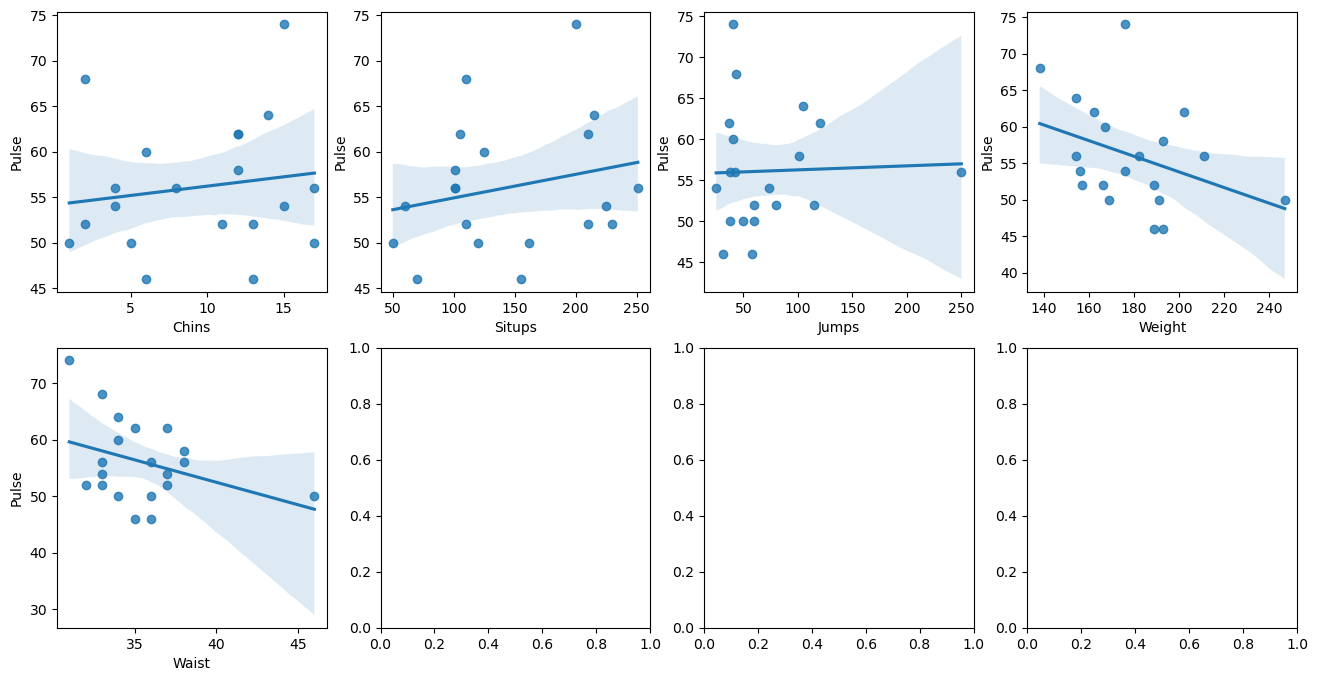

In [9]:
fig, axs = plt.subplots(figsize=(16,8), ncols=4, nrows=2)
lm_features = ['Chins', 'Situps','Jumps','Weight','Waist']

for i, feature in enumerate(lm_features):
    row = int(i/4)
    col =i%4
    
    sns.regplot(x=feature, y='Pulse', data=df, ax=axs[row][col])

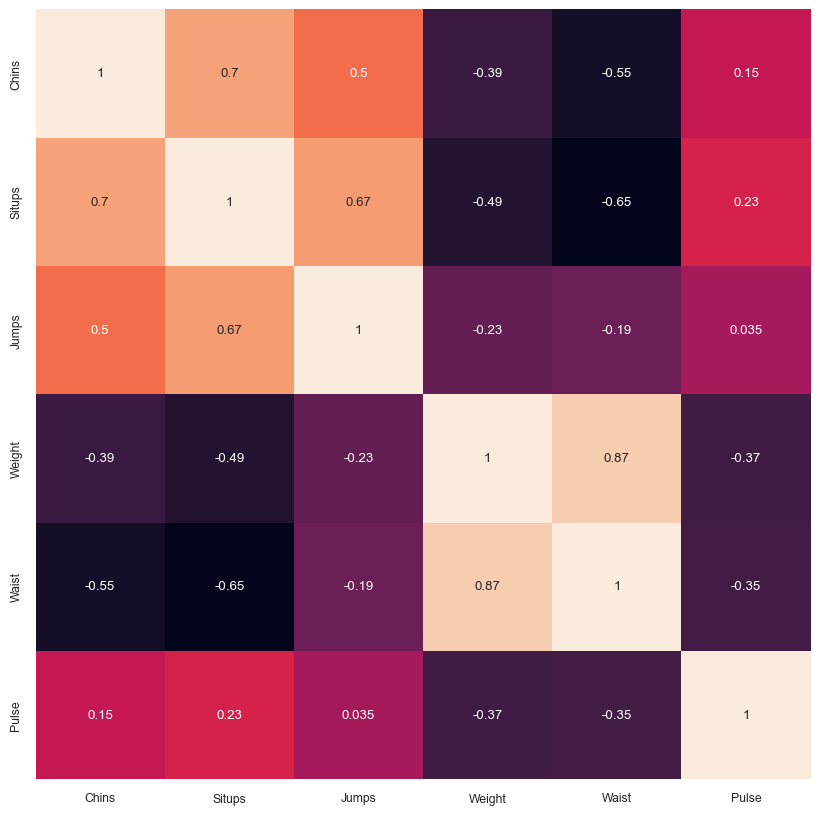

In [10]:
df_corr=df.corr()

plt.figure(figsize=(10,10))
sns.set(font_scale=0.8)
sns.heatmap(df_corr, annot=True, cbar=False)
plt.show()

In [11]:
Y=df['Pulse']
Y

0     50.0
1     52.0
2     58.0
3     62.0
4     46.0
5     56.0
6     56.0
7     60.0
8     74.0
9     56.0
10    50.0
11    52.0
12    64.0
13    50.0
14    46.0
15    62.0
16    54.0
17    52.0
18    54.0
19    68.0
Name: Pulse, dtype: float64

In [22]:
X = df.drop(['Pulse'], axis = 1)
X

,Chins,Situps,Jumps,Weight,Waist
0,5.0,162.0,60.0,191.0,36.0
1,2.0,110.0,60.0,189.0,37.0
2,12.0,101.0,101.0,193.0,38.0
3,12.0,105.0,37.0,162.0,35.0
4,13.0,155.0,58.0,189.0,35.0
5,4.0,101.0,42.0,182.0,36.0
6,8.0,101.0,38.0,211.0,38.0
7,6.0,125.0,40.0,167.0,34.0
8,15.0,200.0,40.0,176.0,31.0
9,17.0,251.0,250.0,154.0,33.0


In [23]:
from sklearn.model_selection import train_test_split
X = X.iloc[:,0:5].values

In [24]:
X

array([[  5., 162.,  60., 191.,  36.],
       [  2., 110.,  60., 189.,  37.],
       [ 12., 101., 101., 193.,  38.],
       [ 12., 105.,  37., 162.,  35.],
       [ 13., 155.,  58., 189.,  35.],
       [  4., 101.,  42., 182.,  36.],
       [  8., 101.,  38., 211.,  38.],
       [  6., 125.,  40., 167.,  34.],
       [ 15., 200.,  40., 176.,  31.],
       [ 17., 251., 250., 154.,  33.],
       [ 17., 120.,  38., 169.,  34.],
       [ 13., 210., 115., 166.,  33.],
       [ 14., 215., 105., 154.,  34.],
       [  1.,  50.,  50., 247.,  46.],
       [  6.,  70.,  31., 193.,  36.],
       [ 12., 210., 120., 202.,  37.],
       [  4.,  60.,  25., 176.,  37.],
       [ 11., 230.,  80., 157.,  32.],
       [ 15., 225.,  73., 156.,  33.],
       [  2., 110.,  43., 138.,  33.]])

In [25]:
X.shape

(20, 5)

In [26]:
Y.shape

(20,)

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2, random_state=0)

In [34]:
import numpy as np

mean = np.mean(X_train, axis = 0)
std = np.std(X_train, axis = 0)

X_train = (X_train - mean) / std
X_test = (X_test - mean) / std

In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(64, activation = 'relu', input_shape = (5,)))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(1))
model.compile(optimizer = 'rmsprop', loss = 'mse', metrics = ['mse'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                384       
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2,497
Trainable params: 2,497
Non-trainable params: 0
_________________________________________________________________


In [36]:
N_EPOCHS = 100
history = model.fit(X_train, y_train, epochs = N_EPOCHS, validation_data=(X_test, y_test))

Epoch 1/100
1/1 [==============================] - 0s 324ms/step - loss: 3004.6208 - mse: 3004.6208 - val_loss: 3898.5000 - val_mse: 3898.5000
Epoch 2/100
1/1 [==============================] - 0s 19ms/step - loss: 2990.1333 - mse: 2990.1333 - val_loss: 3883.7642 - val_mse: 3883.7642
Epoch 3/100
1/1 [==============================] - 0s 21ms/step - loss: 2979.3022 - mse: 2979.3022 - val_loss: 3869.5811 - val_mse: 3869.5811
Epoch 4/100
1/1 [==============================] - 0s 21ms/step - loss: 2969.0215 - mse: 2969.0215 - val_loss: 3856.6787 - val_mse: 3856.6787
Epoch 5/100
1/1 [==============================] - 0s 20ms/step - loss: 2959.6184 - mse: 2959.6184 - val_loss: 3843.8701 - val_mse: 3843.8701
Epoch 6/100
1/1 [==============================] - 0s 20ms/step - loss: 2950.5195 - mse: 2950.5195 - val_loss: 3830.9287 - val_mse: 3830.9287
Epoch 7/100
1/1 [==============================] - 0s 22ms/step - loss: 2941.4565 - mse: 2941.4565 - val_loss: 3818.5842 - val_mse: 3818.5842
Epoch

1/1 [==============================] - 0s 19ms/step - loss: 2361.1265 - mse: 2361.1265 - val_loss: 3078.8794 - val_mse: 3078.8794
Epoch 59/100
1/1 [==============================] - 0s 19ms/step - loss: 2346.2866 - mse: 2346.2866 - val_loss: 3059.7788 - val_mse: 3059.7788
Epoch 60/100
1/1 [==============================] - 0s 19ms/step - loss: 2331.3098 - mse: 2331.3098 - val_loss: 3040.4800 - val_mse: 3040.4800
Epoch 61/100
1/1 [==============================] - 0s 21ms/step - loss: 2316.2075 - mse: 2316.2075 - val_loss: 3020.9905 - val_mse: 3020.9905
Epoch 62/100
1/1 [==============================] - 0s 22ms/step - loss: 2300.9822 - mse: 2300.9822 - val_loss: 3001.3066 - val_mse: 3001.3066
Epoch 63/100
1/1 [==============================] - 0s 19ms/step - loss: 2285.6360 - mse: 2285.6360 - val_loss: 2981.4316 - val_mse: 2981.4316
Epoch 64/100
1/1 [==============================] - 0s 19ms/step - loss: 2270.1570 - mse: 2270.1570 - val_loss: 2961.3633 - val_mse: 2961.3633
Epoch 65/100

In [37]:
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 14ms/step - loss: 2130.4092 - mse: 2130.4092


[2130.4091796875, 2130.4091796875]

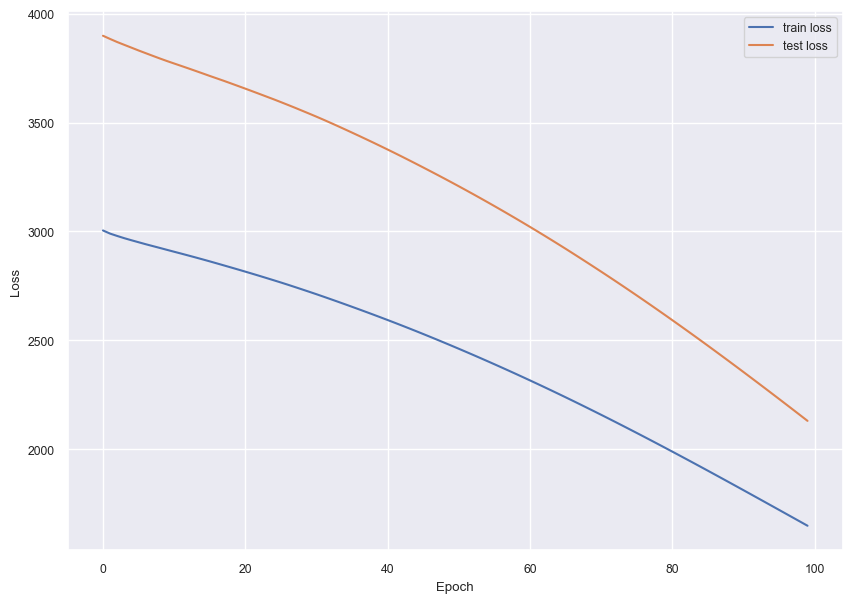

In [38]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.plot(range(N_EPOCHS), history.history['loss'], label='train loss')
plt.plot(range(N_EPOCHS), history.history['val_loss'], label='test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()